#  1. Setup 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
DATA_PATH = Path("../data/raw/dataset.xlsx")
CHARTS_PATH = Path("../charts/eda")
CHARTS_PATH.mkdir(parents=True, exist_ok=True)

In [3]:
df = pd.read_excel(DATA_PATH)


In [4]:
print("Shape:", df.shape)


Shape: (255246, 18)


In [5]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255246 entries, 0 to 255245
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255246 non-null  object 
 1   Age             255246 non-null  int64  
 2   Income          255246 non-null  int64  
 3   LoanAmount      255246 non-null  int64  
 4   CreditScore     255246 non-null  int64  
 5   MonthsEmployed  255246 non-null  int64  
 6   NumCreditLines  255246 non-null  int64  
 7   InterestRate    255246 non-null  float64
 8   LoanTerm        255246 non-null  int64  
 9   DTIRatio        255246 non-null  float64
 10  Education       255246 non-null  object 
 11  EmploymentType  255246 non-null  object 
 12  MaritalStatus   255246 non-null  object 
 13  HasMortgage     255246 non-null  object 
 14  HasDependents   255246 non-null  object 
 15  LoanPurpose     255246 non-null  object 
 16  HasCoSigner     255246 non-null  object 
 17  Default   

In [6]:
df.describe()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255246.000000,255246.000000,255246.000000,255246.000000,255246.000000,255246.000000,255246.000000,255246.000000,255246.000000,255246.000000
mean,43.497434,82500.901475,127575.988881,574.269317,59.543311,2.501081,13.492789,36.025716,0.500217,0.116139
std,14.990177,38963.557261,70842.305278,158.902794,34.642822,1.117015,6.636541,16.969363,0.230918,0.320392
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48826.000000,66147.250000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82469.500000,127553.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116222.250000,188980.750000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [7]:
df.isnull().sum()


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## Target distribution

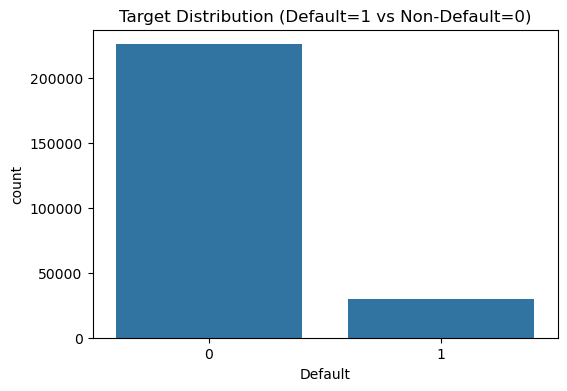

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x="Default", data=df)
plt.title("Target Distribution (Default=1 vs Non-Default=0)")
plt.savefig(CHARTS_PATH / "target_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

##  Univariate analysis (numerical) 

In [9]:
num_cols = ["Age", "Income", "LoanAmount", "CreditScore", 
            "MonthsEmployed", "InterestRate", "LoanTerm", "DTIRatio"]


In [10]:

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.savefig(CHARTS_PATH / f"{col}_distribution.png", dpi=300, bbox_inches="tight")
    plt.close()

## Categorical Analyses

In [11]:
cat_cols = ["Education", "EmploymentType", "MaritalStatus", 
            "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]


In [12]:

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f"{col} Counts")
    plt.savefig(CHARTS_PATH / f"{col}_counts.png", dpi=300, bbox_inches="tight")
    plt.close()

## Default rate

In [13]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df.groupby(col)["Default"].mean().plot(kind="bar")
    plt.ylabel("Default Rate")
    plt.title(f"Default Rate by {col}")
    plt.savefig(CHARTS_PATH / f"{col}_default_rate.png", dpi=300, bbox_inches="tight")
    plt.close()

##  Correlation heatmap

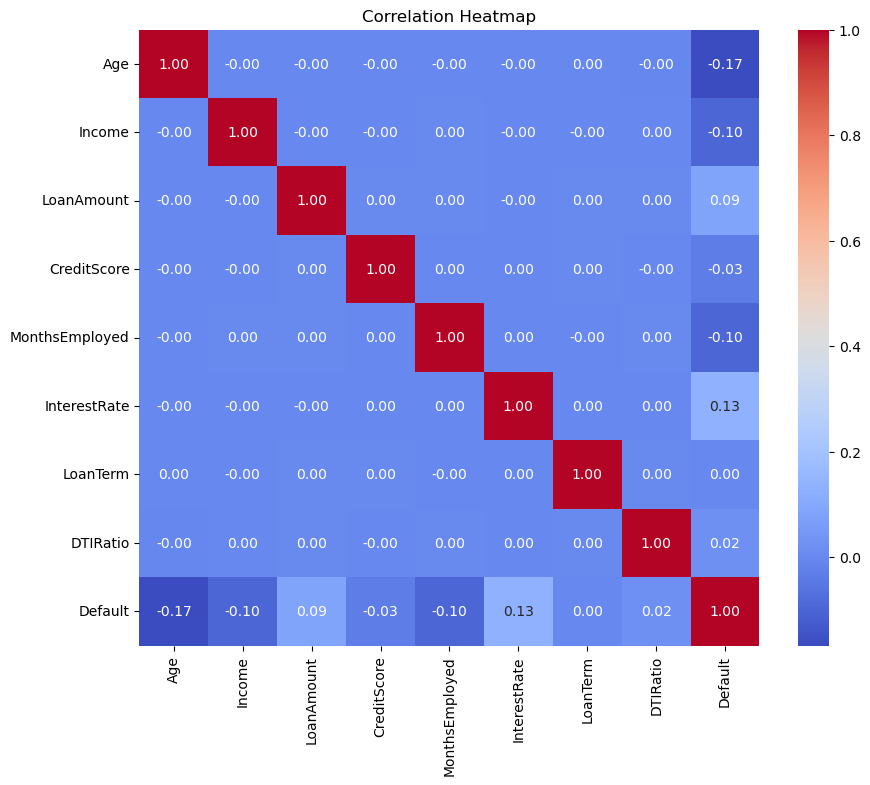

In [14]:
plt.figure(figsize=(10,8))
corr = df[num_cols + ["Default"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.savefig(CHARTS_PATH / "correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()
